# Downloading dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

In [2]:
# Downloading the dataset from kaggle
path = kagglehub.dataset_download("chrisfilo/urbansound8k")

print("Path to dataset files:", path)

100%|██████████| 5.61G/5.61G [00:57<00:00, 105MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chrisfilo/urbansound8k/versions/1


In [3]:
# Loading metadata for audio files
metadata = pd.read_csv(path + "/UrbanSound8K.csv")
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
import librosa
import IPython.display as ipd

In [5]:
# Droping columns we don't need
metadata = metadata.drop(columns=['fsID', 'start', 'end', 'classID', 'salience'])
print(metadata.head())

# Grouping data by classes
grouped_metadata = metadata.groupby('class')
num_classes = len(grouped_metadata)
print(f"Number of classes:", num_classes)

      slice_file_name  fold             class
0    100032-3-0-0.wav     5          dog_bark
1  100263-2-0-117.wav     5  children_playing
2  100263-2-0-121.wav     5  children_playing
3  100263-2-0-126.wav     5  children_playing
4  100263-2-0-137.wav     5  children_playing
Number of classes: 10


# Creating mel spectogram images

In [6]:
def create_spectogram(audio_path, image_path):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    audio, sample_rate = librosa.load(audio_path)
    mel_spectogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    librosa.display.specshow(librosa.amplitude_to_db(mel_spectogram, ref=np.max), sr=sample_rate, fmax=8000)

    fig.savefig(image_path)
    plt.close(fig)
    del audio, sample_rate, mel_spectogram, fig, ax

# Visualize data

Image size: (640, 480)


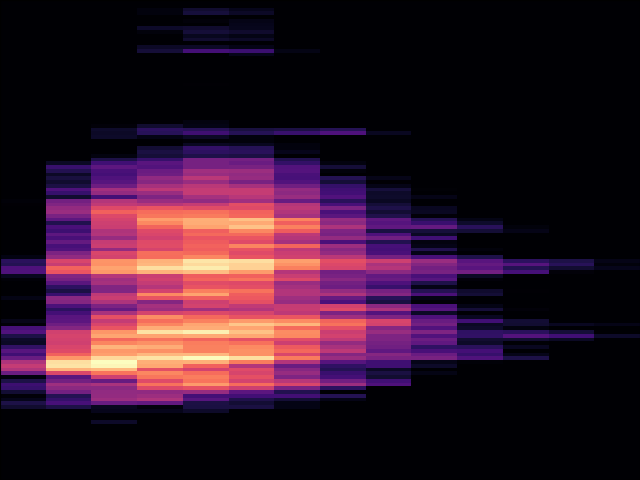

In [7]:
import PIL
import PIL.Image
import gc

# Example spectogram
example_data = metadata.iloc[0]
example_data_path = f"{path}/fold{example_data['fold']}/{example_data['slice_file_name']}"
create_spectogram(example_data_path, "test.png")

# Size of image
print("Image size:", PIL.Image.open("test.png").size)

# Show image
create_spectogram(example_data_path, "test.png")
PIL.Image.open("test.png")

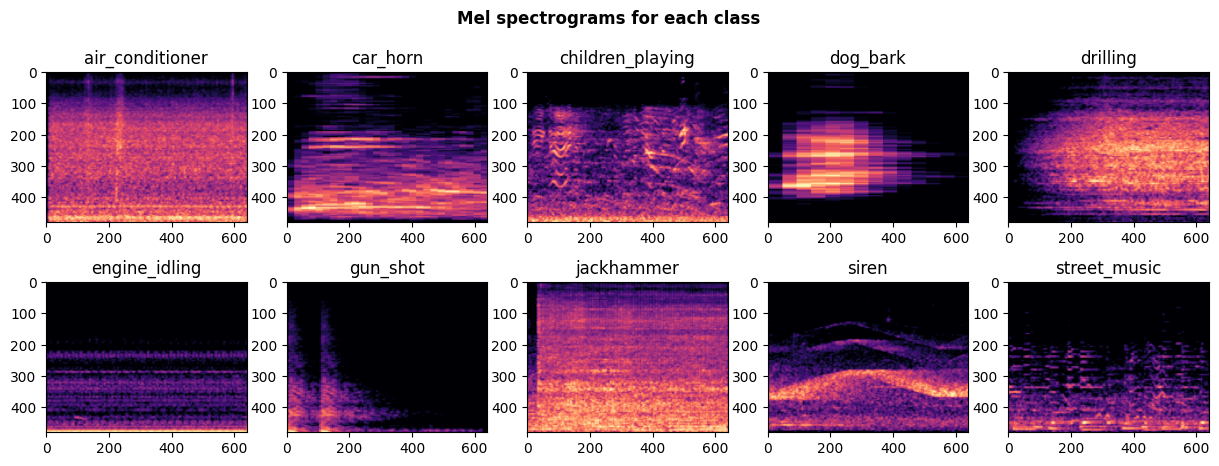

In [8]:
# Visualize a mel spectogram for each class in our dataset
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
fig.suptitle("Mel spectrograms for each class", fontweight="bold")
axes = axes.flatten()

for i, (class_name, group_data) in enumerate(grouped_metadata):
    data = group_data.iloc[0]
    data_path = f"{path}/fold{data['fold']}/{data['slice_file_name']}"
    create_spectogram(data_path, f"test{i}.png")
    img = PIL.Image.open(f"test{i}.png")
    axes[i].imshow(img)
    axes[i].set_title(f"{class_name}")
plt.show()

# Extracting data from dataset

In [ ]:
class_labels = []
image_paths = []

# Create a directory for images
if not os.path.exists("images"):
  os.makedirs("images")

# Extracting features for each file in the dataset
for i in range(0, 10):
  files_path = f"{path}/fold{i+1}/"
  print(f"Feature extraction progress: {10*i}%")
  files = [f for f in os.listdir(files_path)]
  for file in files:
    file_path = os.path.join(files_path, file)
    file_class = metadata.loc[metadata['slice_file_name'] == file, 'class'].values[0]
    create_spectogram(file_path, f"images/{file}.png")
    class_labels.append(file_class)
    image_paths.append(f"images/{file}.png")
  gc.collect()
print("Feature extraction completed")